
# Programa para Realizar Aprendizaje Supervisado

## Etapa 1: Entendimiento de los datos

In [2]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data = pd.read_csv(url, header=None, na_values=" ?")

# Se etiquetan las columnas para poder interpretar más fácilmente los datos.
# Cada fila es un ejemplo, cada columna un atributo.
# La columna llamada C es el atributo a predecir
data.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation',
              'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hpw', 'Country', 'C']
data.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#Cuál es el número de registros?
#Cuál es el número de atributos?

shape = data.shape
shape

(32561, 15)

In [4]:
#Cual es el tipo de los atributos?
data.dtypes

,0
Age,int64
Workclass,object
Fnlwgt,int64
Education,object
Education-num,int64
Marital-status,object
Occupation,object
Relationship,object
Race,object
Sex,object


In [5]:
#Medida de centralidad y desviación para atributos numéricos:
data.describe()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hpw
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


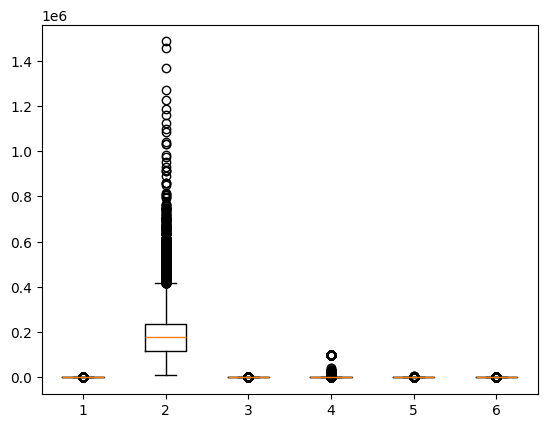

In [6]:
# Diagrama de cajas y bigotes para atributos numéricos
# Permite identificar la existencia de datos atípicos

plt.boxplot((data['Age'],data['Fnlwgt'],data['Education-num'],data['Capital-gain'],data['Capital-loss'], data['Hpw']))
plt.show()

In [7]:
#Medida de centralidad para atributos categóricos:
data.mode()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,36.0,Private,123011,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
1,NaN,NaN,164190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,203488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Correlación entre los atributos de entrada numéricos
# Permite detectar si hay atributos redundantes (correlación mayor a 0.85 o menor a -0.85)

numeric_data = data.select_dtypes(include=np.number)
numeric_data.corr()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hpw
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
Education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
Capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
Capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
Hpw,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [9]:
# Cual es el máximo de datos faltantes en un mismo registro?
# Si hay registros a los que les faltan muchos valores, es mejor eliminarlos.
max(data.isnull().sum(axis=1))

3

In [10]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()

,0
Age,0
Workclass,1836
Fnlwgt,0
Education,0
Education-num,0
Marital-status,0
Occupation,1843
Relationship,0
Race,0
Sex,0


In [11]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?

print(data['C'].value_counts())

C
<=50K    24720
>50K      7841
Name: count, dtype: int64


## Etapa 2: Preparación de los datos

In [12]:
# Se reemplazan los datos faltantes (NaN) por la moda de cada atributo.
data["Workclass"].fillna("Private")
data["Occupation"].fillna("Prof-specialty")
data["Country"].fillna("United-States")
data.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
from sklearn.preprocessing import LabelEncoder

# Se convierten los atributos categóricos a valores numéricos
labelencoder= LabelEncoder()
data['Country'] = labelencoder.fit_transform(data['Country'])
data['Occupation'] = labelencoder.fit_transform(data['Occupation'])
data['Workclass'] = labelencoder.fit_transform(data['Workclass'])
data['Education'] = labelencoder.fit_transform(data['Education'])
data['Marital-status'] = labelencoder.fit_transform(data['Marital-status'])
data['Relationship'] = labelencoder.fit_transform(data['Relationship'])
data['Race'] = labelencoder.fit_transform(data['Race'])
data['Sex'] = labelencoder.fit_transform(data['Sex'])
data['C'] = labelencoder.fit_transform(data['C'])
data.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [14]:
from sklearn import preprocessing

# Se normalizan los tres atributos seleccionados
data['Fnlwgt'] = preprocessing.scale(data['Fnlwgt'])
data['Capital-gain'] = preprocessing.scale(data['Capital-gain'])
data['Capital-loss'] = preprocessing.scale(data['Capital-loss'])
data.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,6,-1.063611,9,13,4,0,1,4,1,0.148453,-0.21666,40,38,0
1,50,5,-1.008707,9,13,2,3,0,4,1,-0.145920,-0.21666,13,38,0
2,38,3,0.245079,11,9,0,5,1,4,1,-0.145920,-0.21666,40,38,0
3,53,3,0.425801,1,7,2,5,0,2,1,-0.145920,-0.21666,40,38,0
4,28,3,1.408176,9,13,2,9,5,2,0,-0.145920,-0.21666,40,4,0


In [15]:
# Se hace balanceo de clases eliminando ejemplos de la clase mayoritaria
g = data.groupby('C')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
dataBal

<ipython-input-15-5a53e21d1c3a>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))


Age  Workclass    Fnlwgt  Education  Education-num  Marital-status  \
C                                                                            
0 0      37          3 -0.549050         11              9               4   
  1      59          0 -0.105339          7             12               2   
  2      55          3 -0.131090         11              9               0   
  3      50          5 -1.491320         11              9               2   
  4      24          3 -0.742156         11              9               4   
...     ...        ...       ...        ...            ...             ...   
1 7836   43          3  0.228006         11              9               1   
  7837   42          0  0.237423         11              9               2   
  7838   22          1 -0.236890          4              3               4   
  7839   46          1 -0.092549          9             13               2   
  7840   45          1  0.028562         15             10               2   

        Occupation  Relationship  Race  Sex  Capital-gain  Capital-loss  Hpw  \
C                                                                              
0 0              2             4     4    1      -0.14592      -0.21666   40   
  1              0             0     4    1      -0.14592      -0.21666   40   
  2              8             1     4    0      -0.14592      -0.21666   40   
  3              4             0     4    1      -0.14592      -0.21666   30   
  4             11             1     4    1      -0.14592      -0.21666   38   
...            ...           ...   ...  ...           ...           ...  ...   
1 7836           2             5     2    0      -0.14592      -0.21666   42   
  7837          12             0     4    1      -0.14592      -0.21666   30   
  7838           5             2     4    1      -0.14592      -0.21666   40   
  7839           9             5     4    0      -0.14592      -0.21666   40   
  7840          10             0     4    1      -0.14592      -0.21666   40   

        Country  C  
C                   
0 0          38  0  
  1          38  0  
  2           9  0  
  3          38  0  
  4          38  0  
...         ... ..  
1 7836       38  1  
  7837       38  1  
  7838       12  1  
  7839       38  1  
  7840       38  1  

[15682 rows x 15 columns]

In [16]:
# Se verifica que haya quedado el mismo número de registros por cada clase
print(dataBal['C'].value_counts())

C
0    7841
1    7841
Name: count, dtype: int64


## Etapa 3: Modelado

In [17]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataBal.drop('C', axis=1), dataBal.C, test_size=0.30)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(10977, 14) (10977,)
(4705, 14) (4705,)


In [18]:
# Entrenamiento del modelo de clasificación por regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logisticRegr = LogisticRegression(solver="lbfgs", max_iter=500, tol=0.01)
logisticRegr.fit(X_train, y_train)


LogisticRegression(max_iter=500, tol=0.01)

In [19]:
# Aplicación del modelo construido a los datos de test
predictions = logisticRegr.predict(X_test)
predictions

array([1, 1, 0, ..., 0, 0, 1])

In [20]:
# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de test
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.761105207226355

# PROGRAMA MODIFICADO

## ETAPA 1 ENTENDIMIENTO DE DATOS

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [22]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data_mod = pd.read_csv(url, header=None, na_values=" ?")

In [23]:
data_mod.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation',
                    'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hpw', 'Country', 'C']
data_mod.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [24]:
data_mod.shape

(32561, 15)

In [25]:
data_mod.dtypes

,0
Age,int64
Workclass,object
Fnlwgt,int64
Education,object
Education-num,int64
Marital-status,object
Occupation,object
Relationship,object
Race,object
Sex,object


In [26]:
data_mod.describe()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hpw
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [27]:
data_mod.isnull().sum()

,0
Age,0
Workclass,1836
Fnlwgt,0
Education,0
Education-num,0
Marital-status,0
Occupation,1843
Relationship,0
Race,0
Sex,0


In [28]:
data_mod['C'].value_counts()

,count
C,
<=50K,24720
>50K,7841


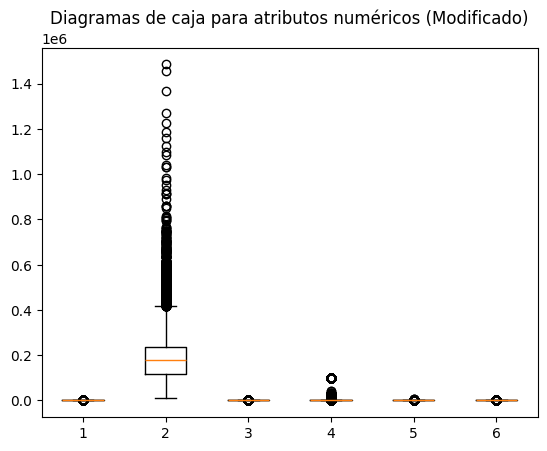

In [29]:
plt.boxplot((data_mod['Age'], data_mod['Fnlwgt'], data_mod['Education-num'], data_mod['Capital-gain'], data_mod['Capital-loss'], data_mod['Hpw']))
plt.title("Diagramas de caja para atributos numéricos (Modificado)")
plt.show()

In [30]:
numeric_data_mod = data_mod.select_dtypes(include=np.number)
print("\nMatriz de correlación entre variables numéricas en el dataset modificado:")
numeric_data_mod.corr()


Matriz de correlación entre variables numéricas en el dataset modificado:


,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hpw
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
Education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
Capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
Capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
Hpw,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


## Etapa 2: Preparación de los datos

In [31]:
data_mod["Workclass"] = data_mod["Workclass"].fillna("Private")
data_mod["Occupation"] = data_mod["Occupation"].fillna("Prof-specialty")
data_mod["Country"] = data_mod["Country"].fillna("United-States")
data_mod.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [32]:
labelencoder_mod = LabelEncoder()
categorical_columns_mod = ['Workclass', 'Education', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country', 'C']
for col in categorical_columns_mod:
    data_mod[col] = labelencoder_mod.fit_transform(data_mod[col])

In [33]:
scaler_mod = StandardScaler()
data_mod[['Capital-gain', 'Capital-loss']] = scaler_mod.fit_transform(data_mod[['Capital-gain', 'Capital-loss']])

In [34]:
g_mod = data_mod.groupby('C')
data_bal_mod = pd.DataFrame(g_mod.apply(lambda x: x.sample(g_mod.size().min()).reset_index(drop=True)))

print("\nNúmero de registros balanceados por clase en el dataset modificado:")
print(data_bal_mod['C'].value_counts())


Número de registros balanceados por clase en el dataset modificado:
C
0    7841
1    7841
Name: count, dtype: int64


<ipython-input-34-68abe8dbc7da>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_bal_mod = pd.DataFrame(g_mod.apply(lambda x: x.sample(g_mod.size().min()).reset_index(drop=True)))


Eliminar un atributo (Fnlwgt) en el dataset modificado

In [35]:
data_bal_mod = data_bal_mod.drop('Fnlwgt', axis=1)
print("\nAtributo 'Fnlwgt' eliminado en el dataset modificado. Nuevas columnas:")
data_bal_mod.columns


Atributo 'Fnlwgt' eliminado en el dataset modificado. Nuevas columnas:


Index(['Age', 'Workclass', 'Education', 'Education-num', 'Marital-status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain',
       'Capital-loss', 'Hpw', 'Country', 'C'],
      dtype='object')

## Etapa 3: Modelado

Dividir los datos en entrenamiento (60%) y prueba (40%) en el dataset modificado

In [36]:
X_train_mod, X_test_mod, y_train_mod, y_test_mod = train_test_split(
    data_bal_mod.drop('C', axis=1), data_bal_mod.C, test_size=0.40, random_state=42)

print("\nTamaño de los datos de entrenamiento en el dataset modificado:", X_train_mod.shape, y_train_mod.shape)
print("Tamaño de los datos de prueba en el dataset modificado:", X_test_mod.shape, y_test_mod.shape)


Tamaño de los datos de entrenamiento en el dataset modificado: (9409, 13) (9409,)
Tamaño de los datos de prueba en el dataset modificado: (6273, 13) (6273,)


Entrenar el modelo con un árbol de decisión en el dataset modificado

In [37]:
tree_model_mod = DecisionTreeClassifier(random_state=42)
tree_model_mod.fit(X_train_mod, y_train_mod)

DecisionTreeClassifier(random_state=42)

In [38]:
tree_predictions_mod = tree_model_mod.predict(X_test_mod)
print("\nPrimeras predicciones del árbol de decisión en el dataset modificado:")
print(tree_predictions_mod[:10])


Primeras predicciones del árbol de decisión en el dataset modificado:
[0 1 0 0 1 0 0 0 1 1]


In [39]:
accuracy_mod = accuracy_score(y_test_mod, tree_predictions_mod)
print("\nAccuracy del árbol de decisión en el dataset modificado:", accuracy_mod)


Accuracy del árbol de decisión en el dataset modificado: 0.7696476964769647


In [40]:
print("\nReporte de clasificación del árbol de decisión en el dataset modificado:")
print(classification_report(y_test_mod, tree_predictions_mod))


Reporte de clasificación del árbol de decisión en el dataset modificado:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      3126
           1       0.77      0.77      0.77      3147

    accuracy                           0.77      6273
   macro avg       0.77      0.77      0.77      6273
weighted avg       0.77      0.77      0.77      6273



# ANÁLISIS COMPARATIVO

In [41]:
# Extraer métricas del modelo original (regresión logística)
logistic_accuracy = accuracy_score(y_test, predictions)
logistic_report = classification_report(y_test, predictions, output_dict=True)

In [42]:
# Extraer métricas del modelo modificado (árbol de decisión)
tree_accuracy = accuracy_score(y_test_mod, tree_predictions_mod)
tree_report = classification_report(y_test_mod, tree_predictions_mod, output_dict=True)

In [43]:
# Crear una tabla de comparación de métricas
comparison = pd.DataFrame({
    "Metric": ["Accuracy", "Precision (Clase 0)", "Recall (Clase 0)", "F1-Score (Clase 0)",
               "Precision (Clase 1)", "Recall (Clase 1)", "F1-Score (Clase 1)"],
    "Logistic Regression": [
        logistic_accuracy,
        logistic_report['0']['precision'], logistic_report['0']['recall'], logistic_report['0']['f1-score'],
        logistic_report['1']['precision'], logistic_report['1']['recall'], logistic_report['1']['f1-score']
    ],
    "Decision Tree": [
        tree_accuracy,
        tree_report['0']['precision'], tree_report['0']['recall'], tree_report['0']['f1-score'],
        tree_report['1']['precision'], tree_report['1']['recall'], tree_report['1']['f1-score']
    ]
})

In [45]:
comparison

,Metric,Logistic Regression,Decision Tree
0,Accuracy,0.761105,0.769648
1,Precision (Clase 0),0.768079,0.768273
2,Recall (Clase 0),0.755154,0.769994
3,F1-Score (Clase 0),0.761561,0.769132
4,Precision (Clase 1),0.754223,0.771019
5,Recall (Clase 1),0.767182,0.769304
6,F1-Score (Clase 1),0.760647,0.770161


In [48]:
metrics = ["Accuracy", "Precision (Clase 0)", "Recall (Clase 0)", "F1-Score (Clase 0)",
           "Precision (Clase 1)", "Recall (Clase 1)", "F1-Score (Clase 1)"]
logistic_values = comparison["Logistic Regression"]
tree_values = comparison["Decision Tree"]

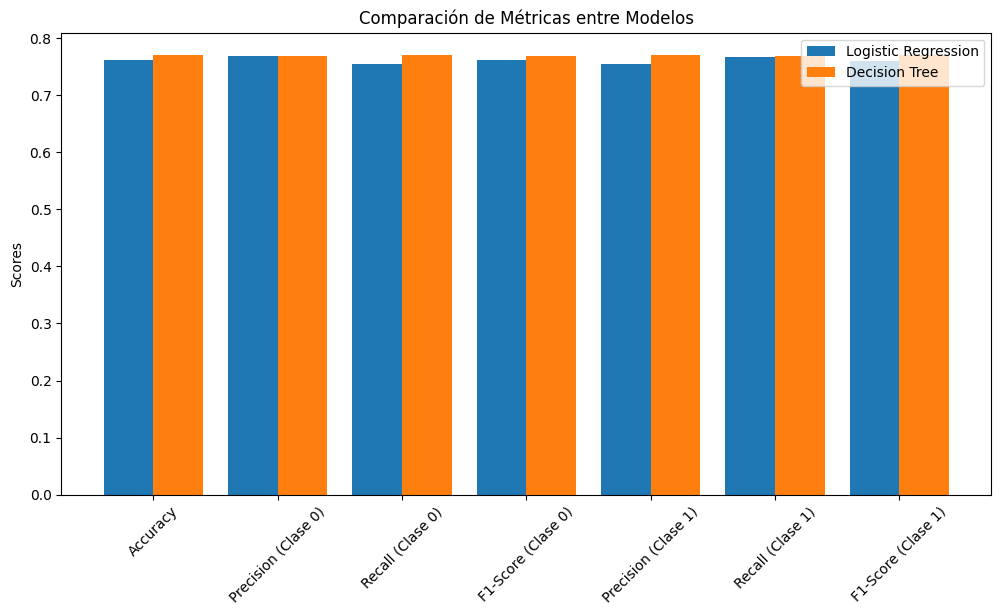

In [49]:
x = range(len(metrics))
plt.figure(figsize=(12, 6))
plt.bar(x, logistic_values, width=0.4, label="Logistic Regression", align="center")
plt.bar([i + 0.4 for i in x], tree_values, width=0.4, label="Decision Tree", align="center")
plt.xticks([i + 0.2 for i in x], metrics, rotation=45)
plt.ylabel("Scores")
plt.title("Comparación de Métricas entre Modelos")
plt.legend()
plt.show()

In [54]:
print("Número de columnas en X_train:", len(X_train.columns))
print("Número de importancias del modelo:", len(tree_model_mod.feature_importances_))

Número de columnas en X_train: 14
Número de importancias del modelo: 13


In [55]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns[:len(tree_model_mod.feature_importances_)],
    'Importance': tree_model_mod.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importance)

           Feature  Importance
4    Education-num    0.291810
0              Age    0.173229
3        Education    0.108154
11    Capital-loss    0.093649
9              Sex    0.092286
5   Marital-status    0.089584
1        Workclass    0.041699
10    Capital-gain    0.029956
2           Fnlwgt    0.020263
12             Hpw    0.017232
6       Occupation    0.016863
7     Relationship    0.014150
8             Race    0.011123


In [58]:
# Convertir importancias a porcentaje
feature_importance['Importance (%)'] = feature_importance['Importance'] * 100

# Mostrar tabla con importancias en porcentaje
print(feature_importance)

           Feature  Importance  Importance (%)
4    Education-num    0.291810       29.180980
0              Age    0.173229       17.322910
3        Education    0.108154       10.815402
11    Capital-loss    0.093649        9.364863
9              Sex    0.092286        9.228644
5   Marital-status    0.089584        8.958384
1        Workclass    0.041699        4.169941
10    Capital-gain    0.029956        2.995634
2           Fnlwgt    0.020263        2.026344
12             Hpw    0.017232        1.723249
6       Occupation    0.016863        1.686326
7     Relationship    0.014150        1.414977
8             Race    0.011123        1.112345


In [56]:
print("Columnas en X_train:", X_train.columns)

Columnas en X_train: Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num',
       'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'Hpw', 'Country'],
      dtype='object')


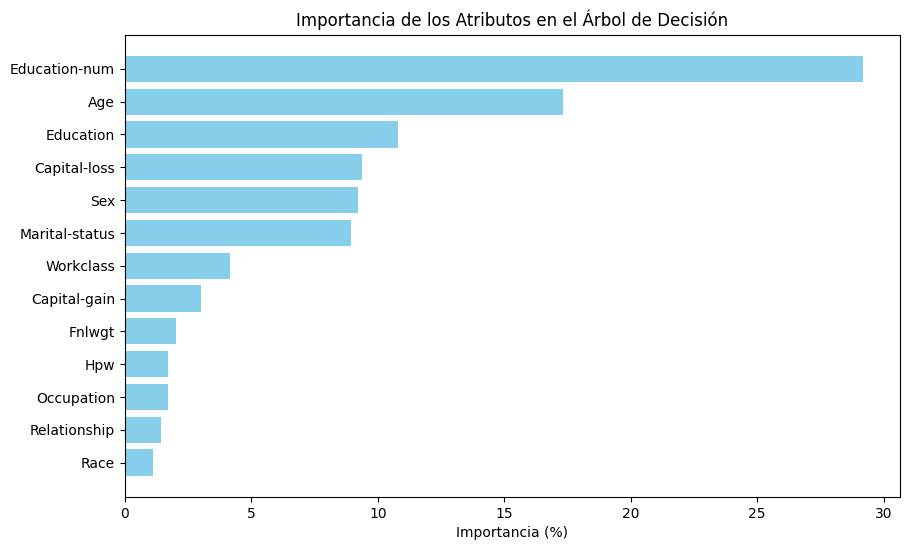

In [59]:
# Gráfico de importancias en porcentaje
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance (%)'], color='skyblue')
plt.xlabel('Importancia (%)')
plt.title('Importancia de los Atributos en el Árbol de Decisión')
plt.gca().invert_yaxis()
plt.show()

## CONCLUSIONES

Accuracy (Precisión global):

La regresión logística tiene una precisión de 0.7611, mientras que el árbol de decisión alcanza 0.7696.
Esto indica que el árbol de decisión tiene un rendimiento ligeramente mejor en términos de clasificación general.

Clase 0 (Precision, Recall y F1-Score):
Precisión (Precision): Ambos modelos tienen valores muy similares (~0.768).
Recall: El árbol de decisión (0.7699) supera ligeramente a la regresión logística (0.7551), lo que significa que el árbol de decisión identifica mejor los casos positivos para la Clase 0.
F1-Score: El árbol de decisión (0.7691) también tiene un mejor equilibrio entre precisión y recall que la regresión logística (0.7615).
Clase 1 (Precision, Recall y F1-Score):

Precisión (Precision): El árbol de decisión (0.7710) supera a la regresión logística (0.7542), lo que indica que comete menos falsos positivos para la Clase 1.
Recall: Ambos modelos tienen valores similares (~0.767-0.769), con una ligera ventaja para la regresión logística en este caso.
F1-Score: El árbol de decisión (0.7701) supera nuevamente a la regresión logística (0.7606), mostrando un mejor rendimiento equilibrado.

Aunque ambos modelos tienen desempeños similares, el árbol de decisión es ligeramente mejor en términos de:

Accuracy (0.7696 vs. 0.7611).
Balance entre precisión y recall (F1-Score) en ambas clases.

## ATRIBUTO ELIMINADO

Se debe aclarar que los datos obtenidos como nivel de importancia para cada atributo no son porcentajes en su forma original. Estos valores son proporciones normalizadas, donde la suma total de las importancias es igual a 1. Sin embargo, para mejorar el entendimiento del proceso, se realiza la conversión a porcentajes al multiplicar estas proporciones por 100.

Durante el entrenamiento del modelo, el atributo Fnlwgt fue eliminado del conjunto de datos. Esto significa que no contribuye a las predicciones en el modelo final.

Según las métricas observadas, el atributo tiene una importancia de 2.02% en el árbol de decisión.
Este porcentaje es relativamente bajo en comparación con atributos clave como Education-num (29.18%) o Age (17.32%).
Esto indica que Fnlwgt aporta muy poca información útil al modelo en relación con otros atributos.
Comportamiento del Árbol de Decisión:

Los árboles de decisión asignan importancia a los atributos con mayor capacidad de dividir correctamente los datos (en términos de reducción de impureza). Al tener una importancia tan baja, Fnlwgt probablemente no participa en las divisiones principales del árbol, y el modelo funciona prácticamente igual sin él.

# **FIN**